In [1]:
import tushare as ts
import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import data from tushare. pick the top 20 high weight stock in csi500
csi300 = ts.get_hs300s()
csi500 = ts.get_zz500s()
csi500.head()
StockPool = csi500.sort_values('weight', ascending=False).iloc[0:20]
print(StockPool)

          date    code  name  weight
483 2020-10-30  300274  阳光电源    0.77
442 2020-10-30  002821   凯莱英    0.74
459 2020-10-30  300012  华测检测    0.69
119 2020-10-30  600739  辽宁成大    0.67
65  2020-10-30  600426  华鲁恒升    0.63
356 2020-10-30  002127  南极电商    0.62
484 2020-10-30  300285  国瓷材料    0.62
365 2020-10-30  002185  华天科技    0.61
15  2020-10-30  600079  人福医药    0.61
476 2020-10-30  300207   欣旺达    0.60
480 2020-10-30  300253  卫宁健康    0.59
23  2020-10-30  600143  金发科技    0.53
33  2020-10-30  600201  生物股份    0.52
44  2020-10-30  600298  安琪酵母    0.51
170 2020-10-30  601099   太平洋    0.50
276 2020-10-30  000547  航天发展    0.50
20  2020-10-30  600132  重庆啤酒    0.50
495 2020-10-30  300496  中科创达    0.49
438 2020-10-30  002797  第一创业    0.49
78  2020-10-30  600521  华海药业    0.48


In [3]:
# build daily data time series of 20 stocks
universe = StockPool['code']
start_date = '2015-01-01'
end_date = '2020-10-31'
bar_size = 'd' 

df = {}
for ticker in universe:
    df[ticker] = ts.get_hist_data(ticker,start=start_date,end=end_date,ktype=bar_size)

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽

In [4]:
for key in df.keys():
    df[key] = df[key].sort_index()

In [5]:
# get an example of ticker = 600298
prices = df['600298']
prices

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2018-05-07,35.50,36.19,36.15,35.10,93470.77,0.67,1.89,36.150,36.150,36.150,93470.77,93470.77,93470.77,1.13
2018-05-08,36.20,36.35,36.24,35.80,65335.35,0.08,0.22,36.195,36.195,36.195,79403.06,79403.06,79403.06,0.79
2018-05-09,36.18,36.20,35.53,35.50,58764.80,-0.68,-1.88,35.973,35.973,35.973,72523.64,72523.64,72523.64,0.71
2018-05-10,35.81,36.39,36.24,35.62,59227.03,0.65,1.83,36.040,36.040,36.040,69199.49,69199.49,69199.49,0.72
2018-05-11,36.25,36.85,36.68,35.82,109466.62,0.48,1.33,36.168,36.168,36.168,77252.91,77252.91,77252.91,1.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,55.21,55.31,53.18,52.68,110577.52,-2.03,-3.68,57.872,59.522,59.322,90247.73,77069.98,81683.92,1.34
2020-10-27,52.65,53.07,52.28,51.80,151243.27,-0.90,-1.69,56.128,58.555,59.046,108411.78,83338.69,86537.29,1.84
2020-10-28,52.98,53.68,53.05,52.20,105513.53,0.77,1.47,54.644,57.638,58.824,117488.82,86853.84,88882.35,1.28


In [6]:
# calculate daily high low, open and close, as well as volumn
lows = prices['low']
highs = prices['high']
closes = prices['close']
opens = prices['open']
volumes = prices['volume']
closes

date
2018-05-07    36.15
2018-05-08    36.24
2018-05-09    35.53
2018-05-10    36.24
2018-05-11    36.68
              ...  
2020-10-26    53.18
2020-10-27    52.28
2020-10-28    53.05
2020-10-29    54.25
2020-10-30    52.82
Name: close, Length: 606, dtype: float64

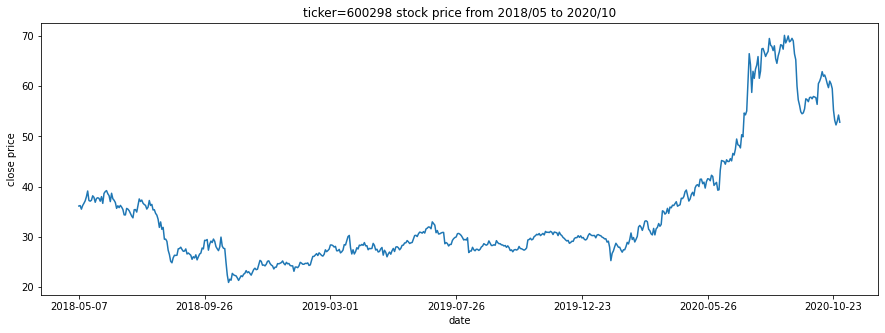

In [85]:
# visualize daily close data
closes.plot(figsize=(15,5))
plt.ylabel('close price')
plt.title('ticker=600298 stock price from 2018/05 to 2020/10')
plt.show()

In [118]:
# claculate daily high low spread
high_low = (highs / lows - 1)*100
high_low

date
2018-05-07    3.105413
2018-05-08    1.536313
2018-05-09    1.971831
2018-05-10    2.161707
2018-05-11    2.875489
                ...   
2020-10-26    4.992407
2020-10-27    2.451737
2020-10-28    2.835249
2020-10-29    4.558514
2020-10-30    3.707929
Length: 606, dtype: float64

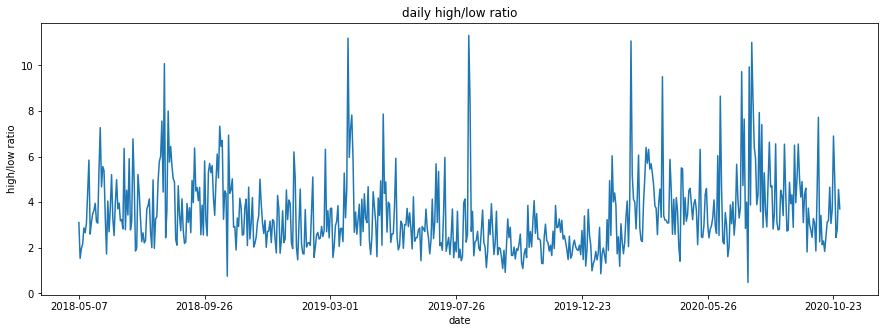

In [119]:
# visualize daily high low spread
high_low.plot(figsize=(15,5))
plt.ylabel('high/low ratio')
plt.title('daily high/low ratio')
plt.show()

In [156]:
# claculate daily open close spread
close_open = (closes / opens - 1)*100
close_open

date
2018-05-07    1.830986
2018-05-08    0.110497
2018-05-09   -1.796573
2018-05-10    1.200782
2018-05-11    1.186207
                ...   
2020-10-26   -3.676870
2020-10-27   -0.702754
2020-10-28    0.132125
2020-10-29    3.728489
2020-10-30   -3.153649
Length: 606, dtype: float64

Text(0.5, 1.0, 'daily close/open ratio')

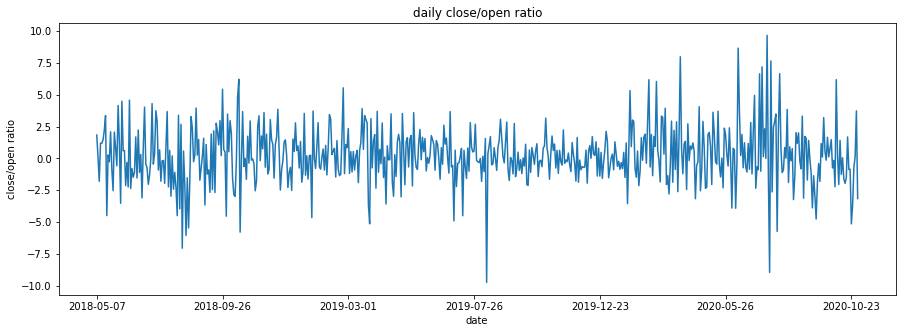

In [157]:
# visualize daily open close spread
close_open.plot(figsize=(15,5))
plt.ylabel('close/open ratio')
plt.title('daily close/open ratio')
#plt.show()

In [120]:
# adfuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(15, 5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

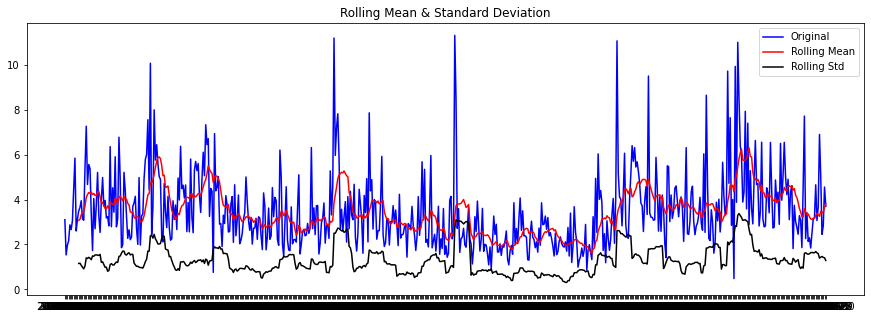

Results of Dickey-Fuller Test:
Test Statistic                -7.743829e+00
p-value                        1.044716e-11
#Lags Used                     3.000000e+00
Number of Observations Used    6.020000e+02
Critical Value (1%)           -3.441259e+00
Critical Value (5%)           -2.866353e+00
Critical Value (10%)          -2.569333e+00
dtype: float64


In [121]:
# stationary test for high_low
test_stationarity(high_low)

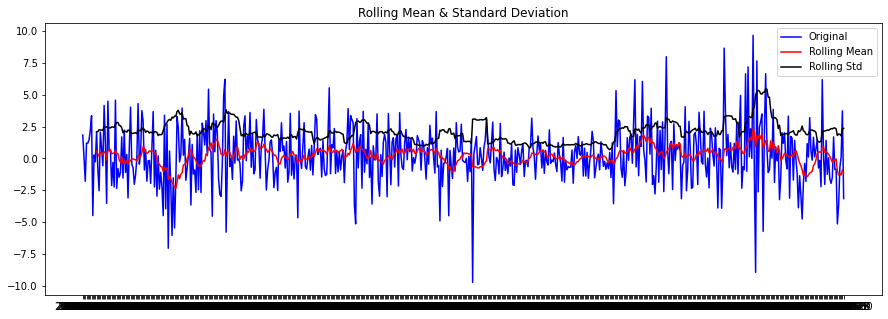

Results of Dickey-Fuller Test:
Test Statistic                -7.375926e+00
p-value                        8.723116e-11
#Lags Used                     8.000000e+00
Number of Observations Used    5.970000e+02
Critical Value (1%)           -3.441351e+00
Critical Value (5%)           -2.866393e+00
Critical Value (10%)          -2.569355e+00
dtype: float64


In [158]:
# stationary test for close_open
test_stationarity(close_open)

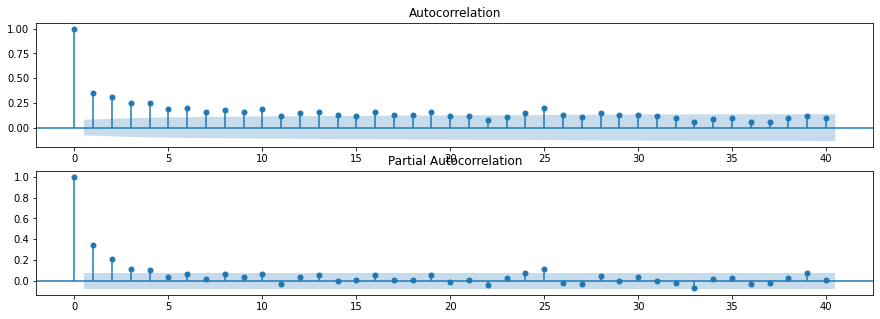

In [122]:
# acf & pacf for high_low
import statsmodels.api as sm
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(high_low, lags=40, ax=ax1) 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(high_low, lags=40, ax=ax2)

In [125]:
# Choose AR(5) as a fitting for high_low according to BIC
mod = sm.tsa.statespace.SARIMAX(high_low.values, order=(5,0,0))
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  606
Model:               SARIMAX(5, 0, 0)   Log Likelihood               -1129.711
Date:                Wed, 04 Nov 2020   AIC                           2271.422
Time:                        17:39:25   BIC                           2297.863
Sample:                             0   HQIC                          2281.710
                                - 606                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3115      0.036      8.596      0.000       0.240       0.382
ar.L2          0.2282      0.032      7.141      0.000       0.166       0.291
ar.L3          0.1462      0.039      3.752      0.000       0.070       0.223
ar.L4          0.1651      0.035      4.657      0.000       0.096       0.235
ar.L5          0.1117      0.039      2.862      0.004       0.035       0.188
sigma2         2.4272      0.087     27.749      0.000       2.256       2.599
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):               617.16
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               1.59   Skew:                             1.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

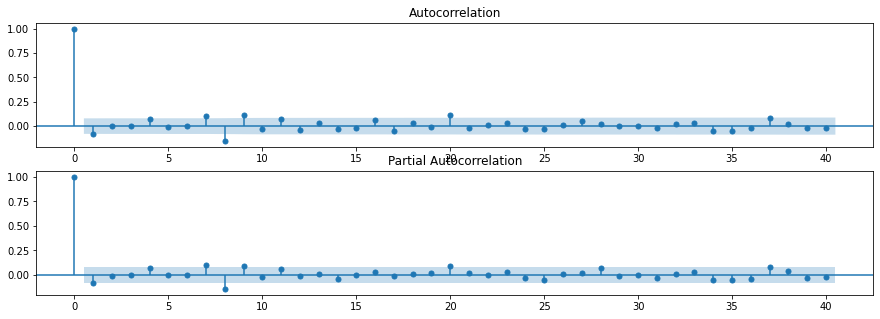

In [159]:
# acf & pacf for close_open
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(close_open, lags=40, ax=ax1) 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(close_open, lags=40, ax=ax2)

In [160]:
print(close_open.describe())

count    606.000000
mean       0.239416
std        2.233649
min       -9.731544
25%       -1.035849
50%        0.137639
75%        1.448583
max        9.651873
dtype: float64


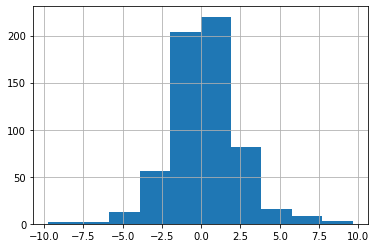

In [161]:
close_open.hist()
plt.show()

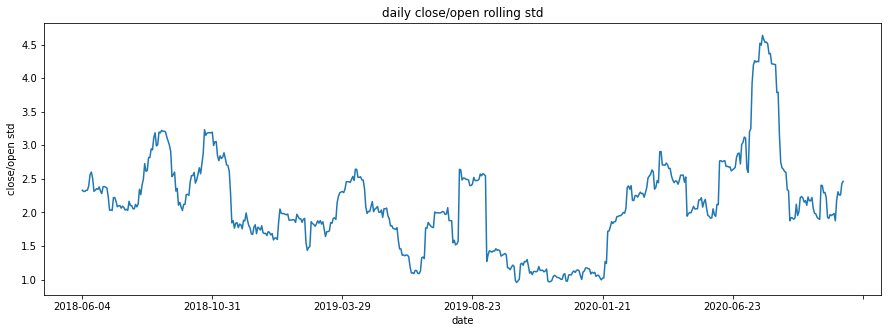

In [162]:
# close_open
rolstd_close_open = close_open.rolling(21).std().dropna()
rolstd_close_open.plot(figsize=(15,5))

plt.ylabel('close/open std')
plt.title('daily close/open rolling std')
plt.show()

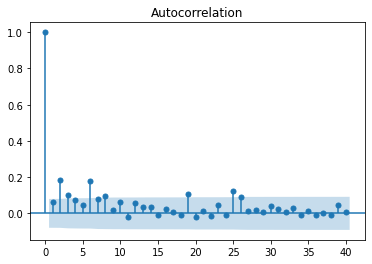

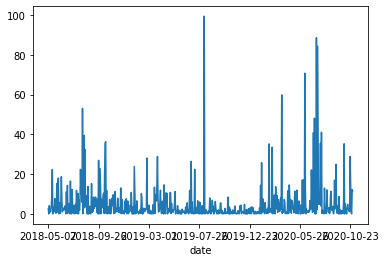

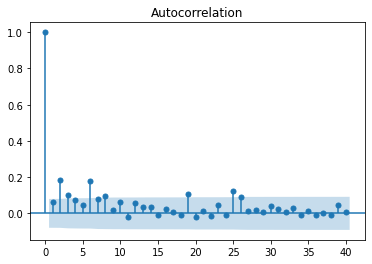

In [174]:
y = (close_open-close_open.mean())*(close_open-close_open.mean())
y
y.plot()
plot_acf(y, lags=40)

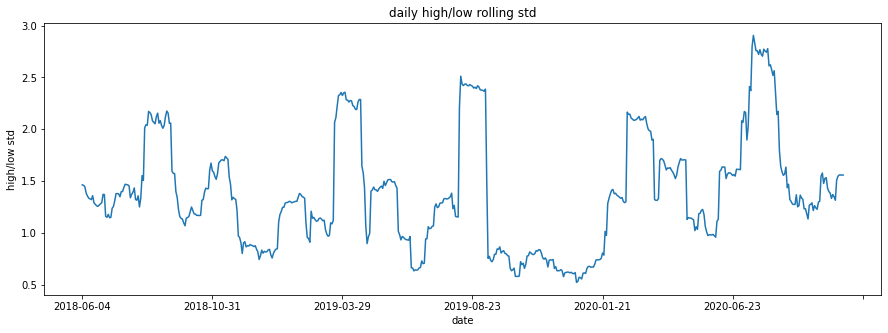

In [126]:
# high_low
rolstd_high_low = high_low.rolling(21).std().dropna()
rolstd_high_low.plot(figsize=(15,5))
plt.ylabel('high/low std')
plt.title('daily high/low rolling std')
plt.show()

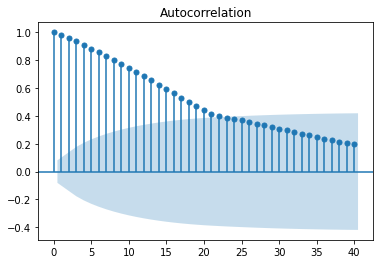

In [163]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(rolstd_close_open, lags=40)
pyplot.show()

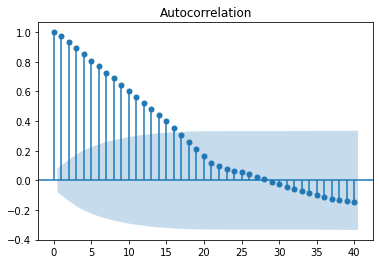

In [127]:
plot_acf(rolstd_high_low, lags=40)
pyplot.show()

In [164]:
# build garch(1,1) model for close_open, by using constant mean, normal dist.
from arch.univariate import arch_model
model_close_open = arch_model(close_open, mean='constant')
res_close_open = model_close_open.fit(update_freq=0)
print(res_close_open.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1325.91227919565
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -1325.91
Distribution:                  Normal   AIC:                           2659.82
Method:            Maximum Likelihood   BIC:                           2677.45
                                        No. Observations:                  606
Date:                Wed, Nov 04 2020   Df Residuals:                      602
Time:                        19:25:58   Df Model:                            4
                                Mean Model                                
        

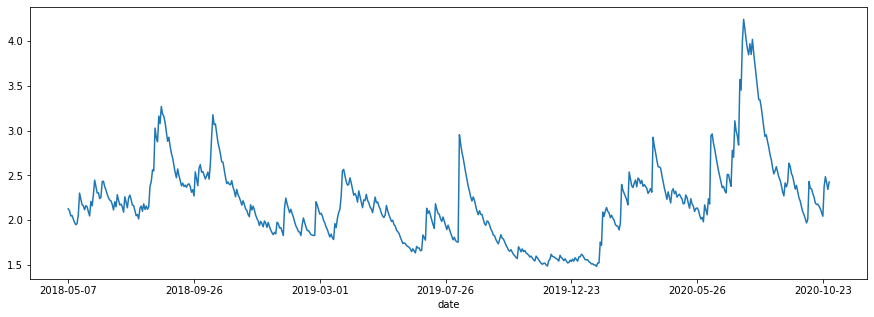

In [166]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,5))
res_close_open.conditional_volatility.dropna().plot() 
plt.show()

In [167]:
pd.DataFrame(res_close_open.params)

,params
mu,0.208140
omega,0.131475
alpha[1],0.058289
beta[1],0.917049


In [168]:
forecasts_close_open = res_close_open.forecast(horizon=2)

In [169]:
print(forecasts_close_open.mean.dropna().head())
print(forecasts_close_open.residual_variance.dropna().head())
print(forecasts_close_open.variance.dropna().head())

                h.1      h.2
date                        
2020-10-30  0.20814  0.20814
                 h.1       h.2
date                          
2020-10-30  6.192151  6.170916
                 h.1       h.2
date                          
2020-10-30  6.192151  6.170916


In [128]:
# AR-GARCH model to fit high_low 
print(high_low.describe())

count    606.000000
mean       3.476888
std        1.659197
min        0.481168
25%        2.290636
50%        3.107535
75%        4.202206
max       11.317945
dtype: float64


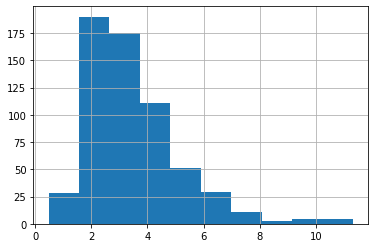

In [129]:
high_low.hist()
plt.show()

In [133]:
model_high_low = arch_model(high_low,mean='ARX', lags=5, vol='GARCH', p=1, o=0, q=1,\
                            power=2.0, dist='skewstudent', hold_back=None)
res_high_low = model_high_low.fit(update_freq=0)
print(res_high_low.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 989.3465805954377
            Iterations: 28
            Function evaluations: 369
            Gradient evaluations: 28
                                 AR - GARCH Model Results                                
Dep. Variable:                              None   R-squared:                       0.169
Mean Model:                                   AR   Adj. R-squared:                  0.162
Vol Model:                                 GARCH   Log-Likelihood:               -989.347
Distribution:      Standardized Skew Student's t   AIC:                           2000.69
Method:                       Maximum Likelihood   BIC:                           2049.08
                                                   No. Observations:                  601
Date:                           Wed, Nov 04 2020   Df Residuals:                      590
Time:                                   17:41:27   Df Model:          

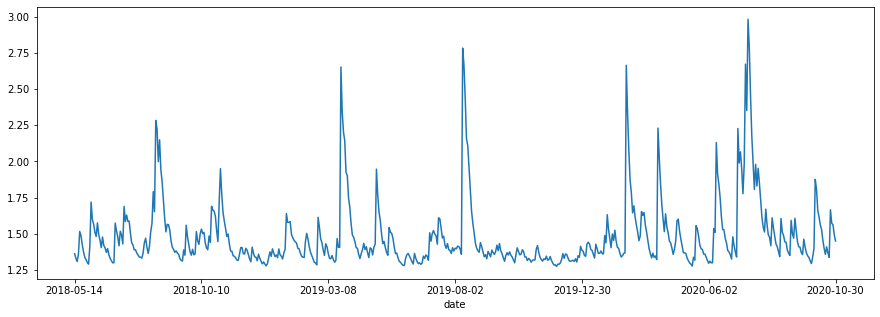

In [155]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,5))
res_high_low.conditional_volatility.dropna().plot()
plt.show()

In [134]:
pd.DataFrame(res_high_low.params)

,params
Const,1.707318
None[1],0.190419
None[2],0.090699
None[3],0.069733
None[4],0.097568
None[5],0.048773
omega,0.460136
alpha[1],0.089970
beta[1],0.704354
nu,5.015992


In [135]:
forecasts_high_low = res_high_low.forecast(horizon=2)
print(forecasts_high_low.mean.dropna().head())
print(forecasts_high_low.residual_variance.dropna().head())
print(forecasts_high_low.variance.dropna().head())

                 h.1       h.2
date                          
2020-10-30  3.507247  3.425557
                 h.1      h.2
date                         
2020-10-30  1.942915  2.00344
                 h.1      h.2
date                         
2020-10-30  1.942915  2.07389


In [137]:
var = rolstd_high_low*rolstd_high_low

In [147]:
var.tail(100)

date
2020-06-03    0.948566
2020-06-04    0.920808
2020-06-05    1.238521
2020-06-08    1.282252
2020-06-09    2.545016
                ...   
2020-10-26    2.392403
2020-10-27    2.433167
2020-10-28    2.429291
2020-10-29    2.432396
2020-10-30    2.429996
Length: 100, dtype: float64

In [148]:
res_high_low.conditional_volatility.dropna().tail(100)

date
2020-06-03    1.310789
2020-06-04    1.299237
2020-06-05    1.299482
2020-06-08    1.535823
2020-06-09    1.509658
                ...   
2020-10-26    1.666001
2020-10-27    1.573096
2020-10-28    1.561364
2020-10-29    1.494057
2020-10-30    1.450292
Name: cond_vol, Length: 100, dtype: float64

In [146]:
rolstd_high_low.tail()

date
2020-10-26    1.546740
2020-10-27    1.559861
2020-10-28    1.558618
2020-10-29    1.559614
2020-10-30    1.558844
dtype: float64